In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import graphviz
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Avec les deux premières membranes

In [ ]:
def load_data():
    df = pd.read_csv("./Donnees_peptides_membranes.csv", sep=";")
    l = ['R1 A-', 'R2 A-', 'R3 A-', 'R1 C+', 'R2 C+', 'R3 C+']
    y = df[l]
    y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',
                      'R3 A-': 'R3_A', 'R1 C+': 'R1_C',
                      'R2 C+': 'R2_C', 'R3 C+': 'R3_C'},
             inplace=True)
    l = l + ['membrane', 'Peptides', 'bend_percent', 'turn_percent']
    df = df.drop(columns=l)
    return df, y

def load_data_mean(boolean):
    """
    Retourne les données. On prend la moyenne de la variable réponse.
    :param boolean: True si on veut les données positives, False sinon.
    :return:
    """
    df, y = load_data()
    if boolean:
        y_pos = y[['R1_C', 'R2_C', 'R2_C']].mean(axis=1)
        return df, y_pos
    else:
        y_neg = y[['R1_A', 'R2_A', 'R3_A']].mean(axis=1)
        return df, y_neg

## Corrélation Membrane-Membrane

<ipython-input-15-671561ae2086>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',


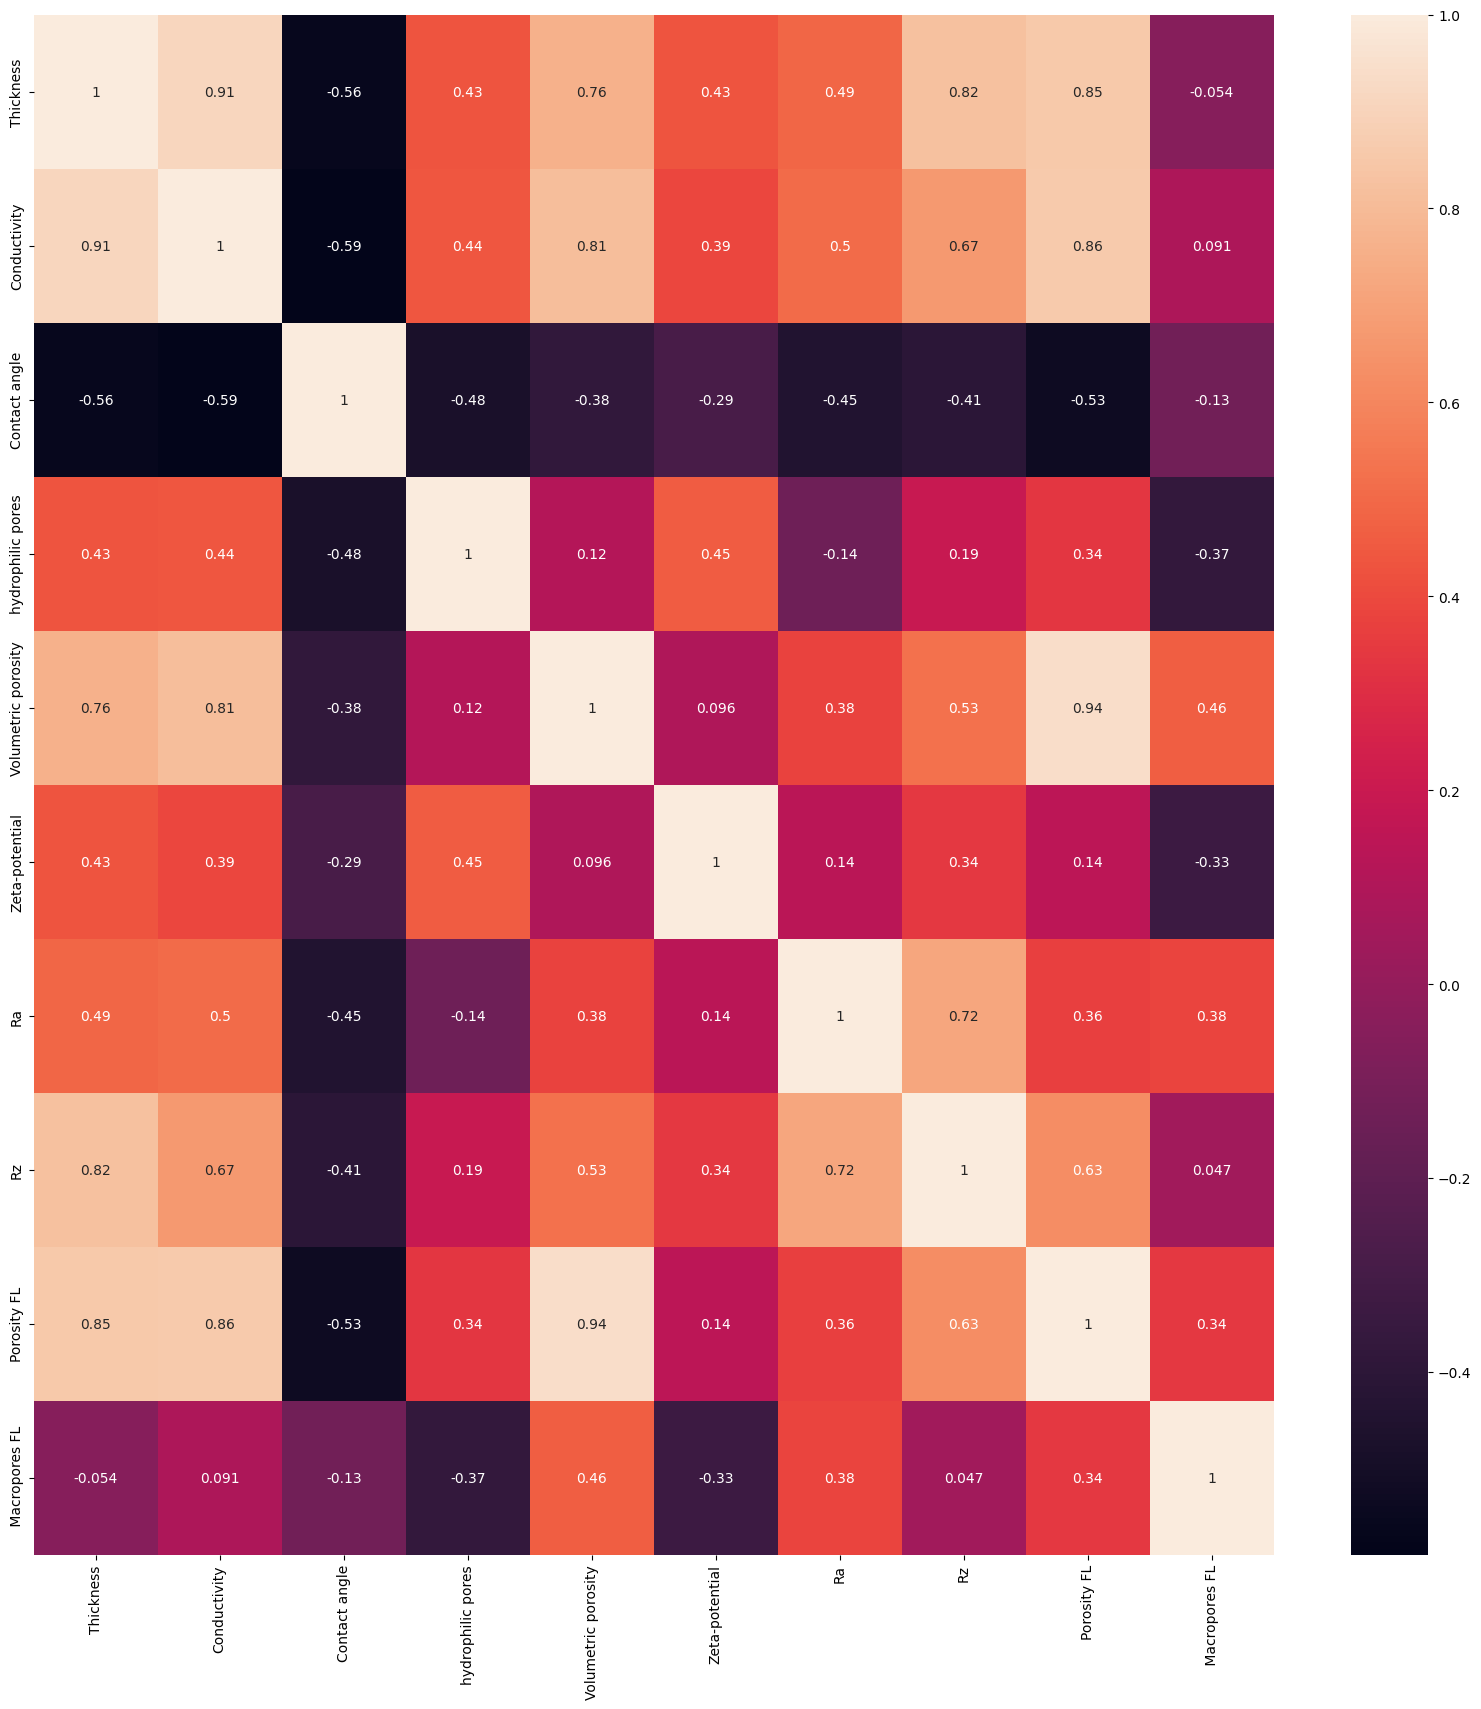

In [ ]:
X, y = load_data_mean(True)
membrane = ['Thickness', 'Conductivity', 'Contact angle', 'hydrophilic pores',
     'Volumetric porosity', 'Zeta-potential', 'Ra', 'Rz', 'Porosity FL',
     ' Macropores FL']
membrane_X = X[membrane]
df_membrane = membrane_X.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(df_membrane, annot=True)
plt.savefig("./matrice_correlation_membrane.pdf")

In [ ]:
array_membrane = df_membrane.values
print("="*20, "Corrélation entre les caractéristiques de membranes", "="*20)
for i in range(array_membrane.shape[0]):
    for j in range(i+1, array_membrane.shape[1]):
        if np.abs(array_membrane[i, j]) >= 0.6:
            print(membrane[i], " + ",  membrane[j], "avec une corrélation de ", array_membrane[i, j])

==================== Corrélation entre les caractéristiques de membranes ====================
Thickness  +  Conductivity avec une corrélation de  0.9100459610461274
Thickness  +  Volumetric porosity avec une corrélation de  0.7580706666653209
Thickness  +  Rz avec une corrélation de  0.823864283233847
Thickness  +  Porosity FL avec une corrélation de  0.8519230583883164
Conductivity  +  Volumetric porosity avec une corrélation de  0.8086906537079726
Conductivity  +  Rz avec une corrélation de  0.6670526985999362
Conductivity  +  Porosity FL avec une corrélation de  0.8633771048044923
Volumetric porosity  +  Porosity FL avec une corrélation de  0.9381394799239715
Ra  +  Rz avec une corrélation de  0.7151876468141989
Rz  +  Porosity FL avec une corrélation de  0.6276019520024607


## Corrélation Peptide-Peptide

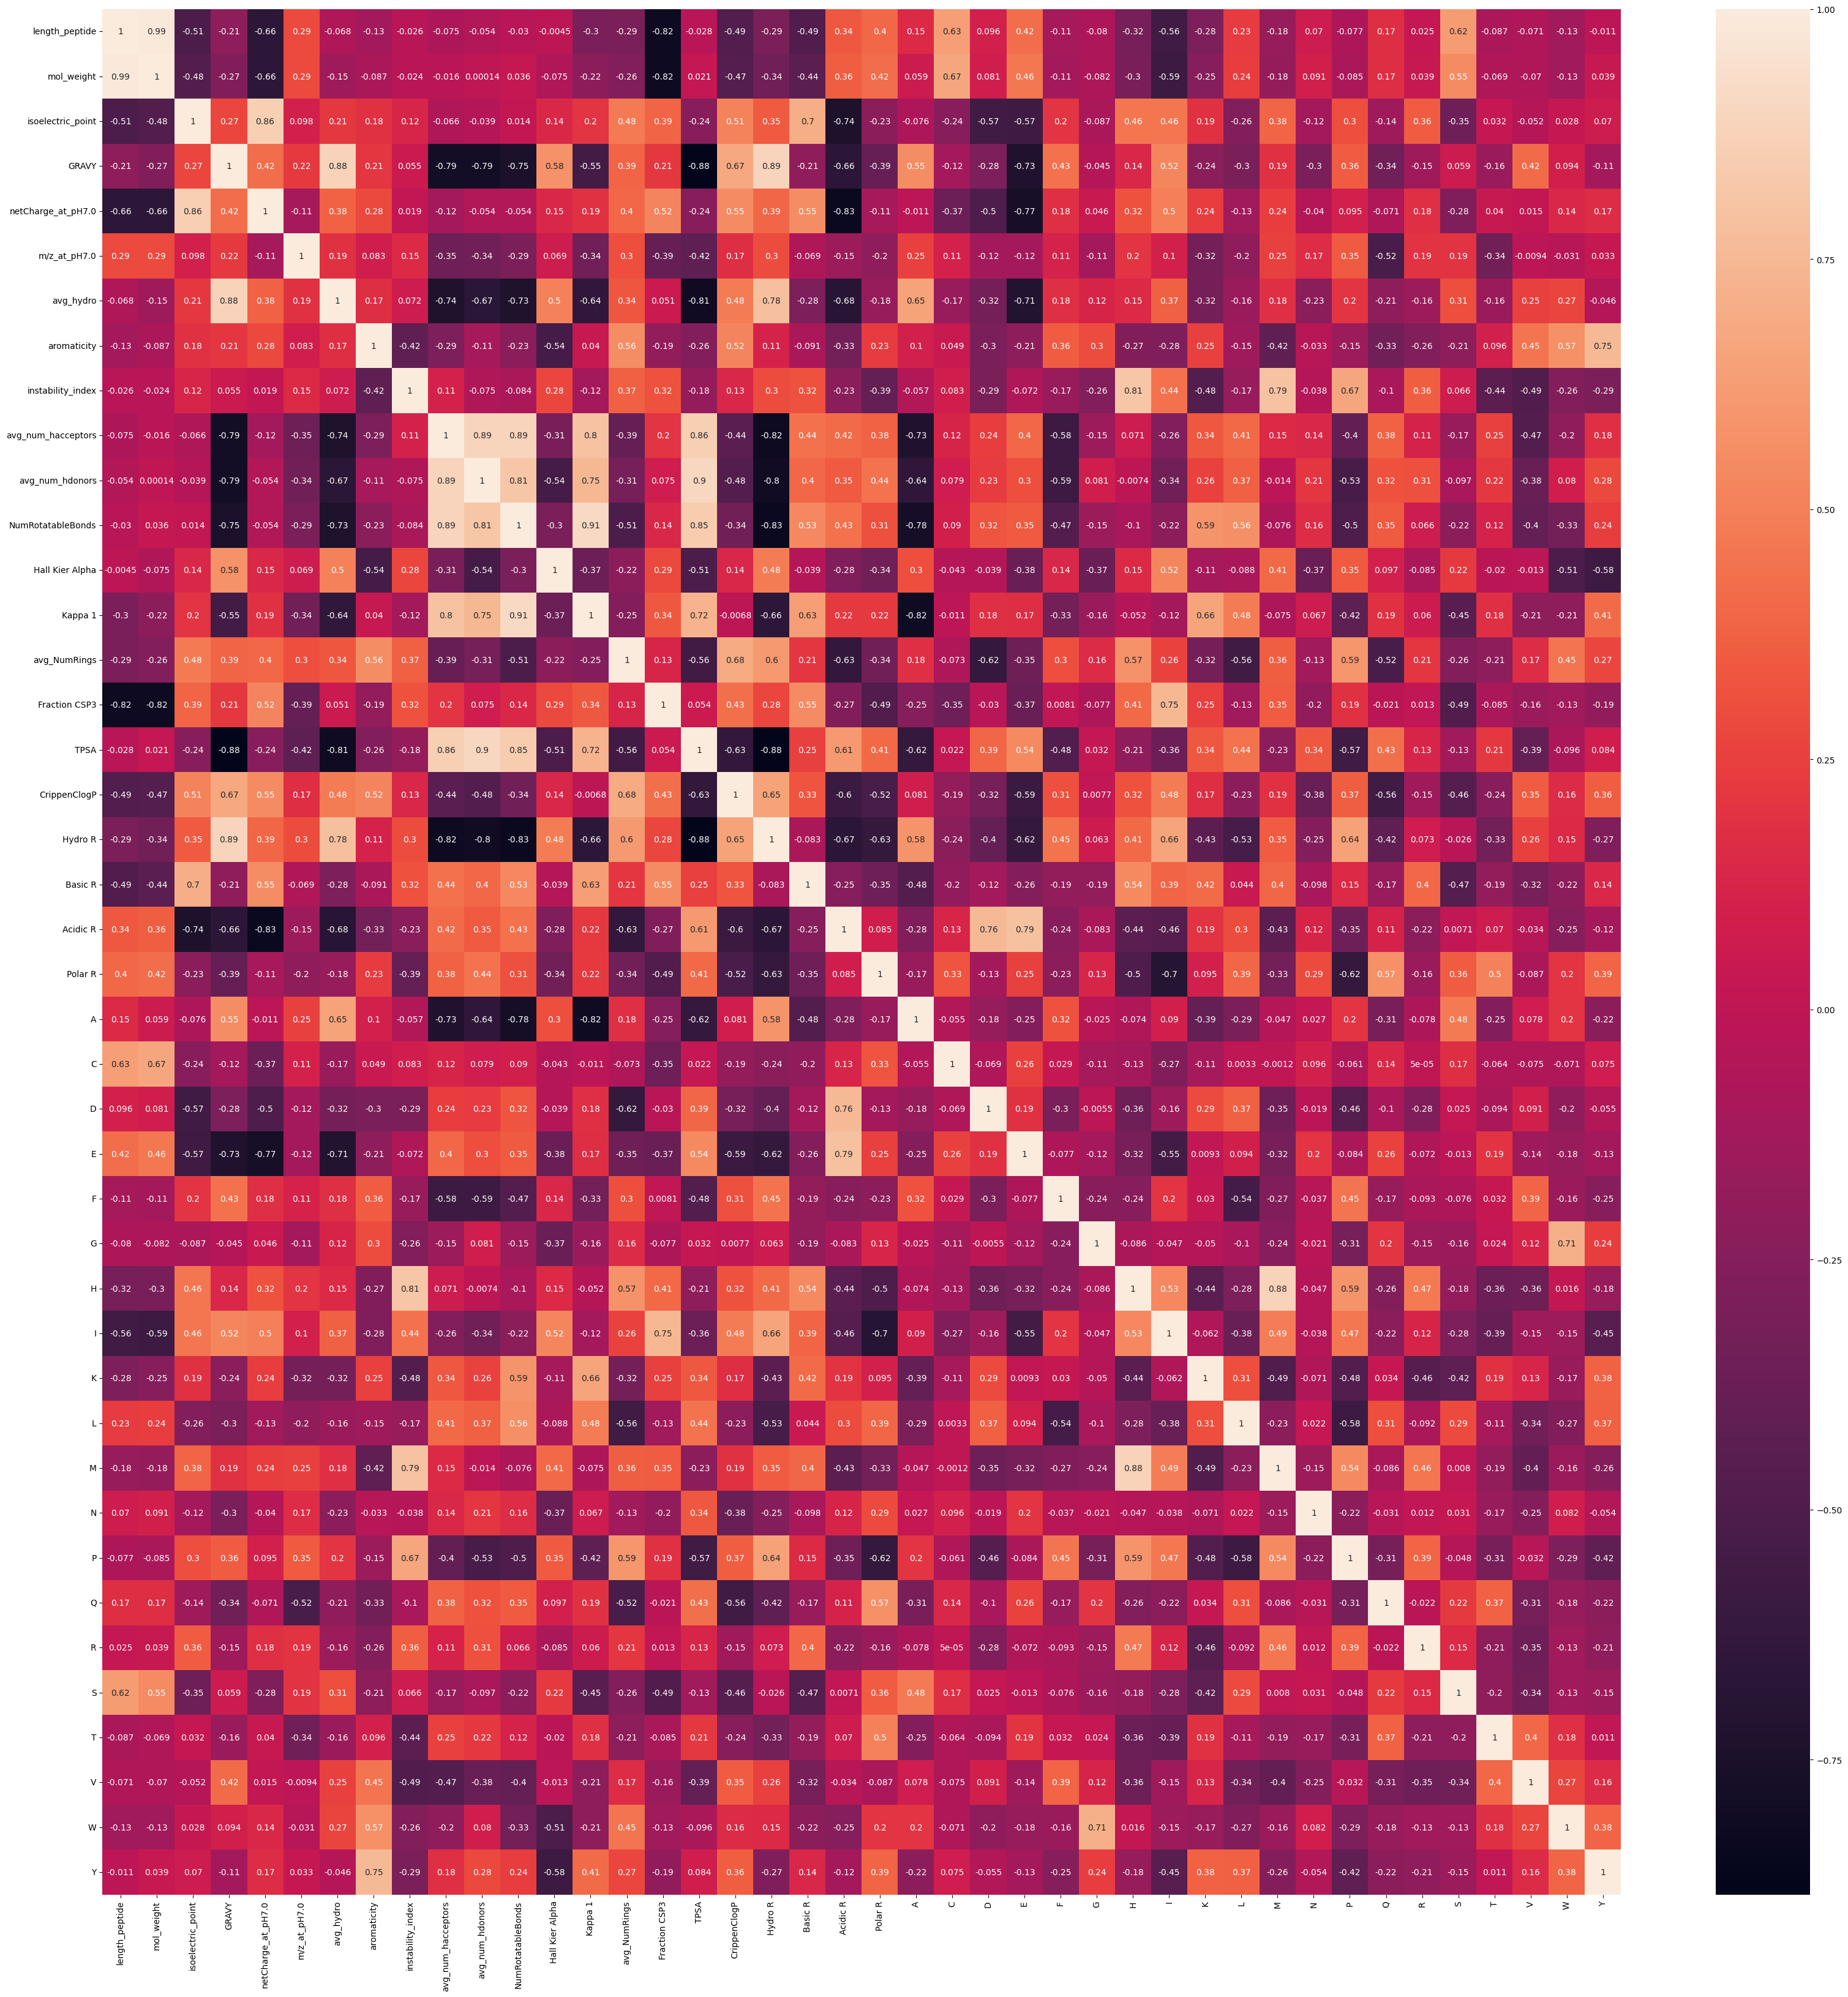

In [ ]:
peptide = ['length_peptide', 'mol_weight', 'isoelectric_point',
  'GRAVY', 'netCharge_at_pH7.0', 'm/z_at_pH7.0', 'avg_hydro',
  'aromaticity', 'instability_index', 'avg_num_hacceptors',
  'avg_num_hdonors', 'NumRotatableBonds', 'Hall Kier Alpha', 'Kappa 1',
  'avg_NumRings', 'Fraction CSP3', 'TPSA', 'CrippenClogP', 'Hydro R',
  'Basic R', 'Acidic R', 'Polar R', 'A', 'C', 'D', 'E', 'F', 'G', 'H',
  'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
peptide_X = X[peptide]
df_peptide = peptide_X.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(df_peptide, annot=True)
plt.savefig("./matrice_correlation_peptide.pdf")

In [ ]:
print("\n", "=" * 20, "Corrélation entre les caractéristiques de peptides", "=" * 20)
array_peptide = df_peptide.values
for i in range(array_peptide.shape[0]):
    for j in range(i+1, array_peptide.shape[1]):
        if np.abs(array_peptide[i, j]) >= 0.6:
            print(peptide[i], " + ", peptide[j], "avec une corrélation de ", array_peptide[i, j])


 ==================== Corrélation entre les caractéristiques de peptides ====================
length_peptide  +  mol_weight avec une corrélation de  0.9925880795421803
length_peptide  +  netCharge_at_pH7.0 avec une corrélation de  -0.6603263035153891
length_peptide  +  Fraction CSP3 avec une corrélation de  -0.8210130674625106
length_peptide  +  C avec une corrélation de  0.6283594311473637
length_peptide  +  S avec une corrélation de  0.6193104755755904
mol_weight  +  netCharge_at_pH7.0 avec une corrélation de  -0.6569525848851393
mol_weight  +  Fraction CSP3 avec une corrélation de  -0.8205303552030486
mol_weight  +  C avec une corrélation de  0.6678842894371941
isoelectric_point  +  netCharge_at_pH7.0 avec une corrélation de  0.8579940568673535
isoelectric_point  +  Basic R avec une corrélation de  0.6983668743373618
isoelectric_point  +  Acidic R avec une corrélation de  -0.7393375222776651
GRAVY  +  avg_hydro avec une corrélation de  0.8814619126196294
GRAVY  +  avg_num_hacceptor

## Corrélation données-étiquettes

<ipython-input-15-671561ae2086>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',
<ipython-input-15-671561ae2086>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',


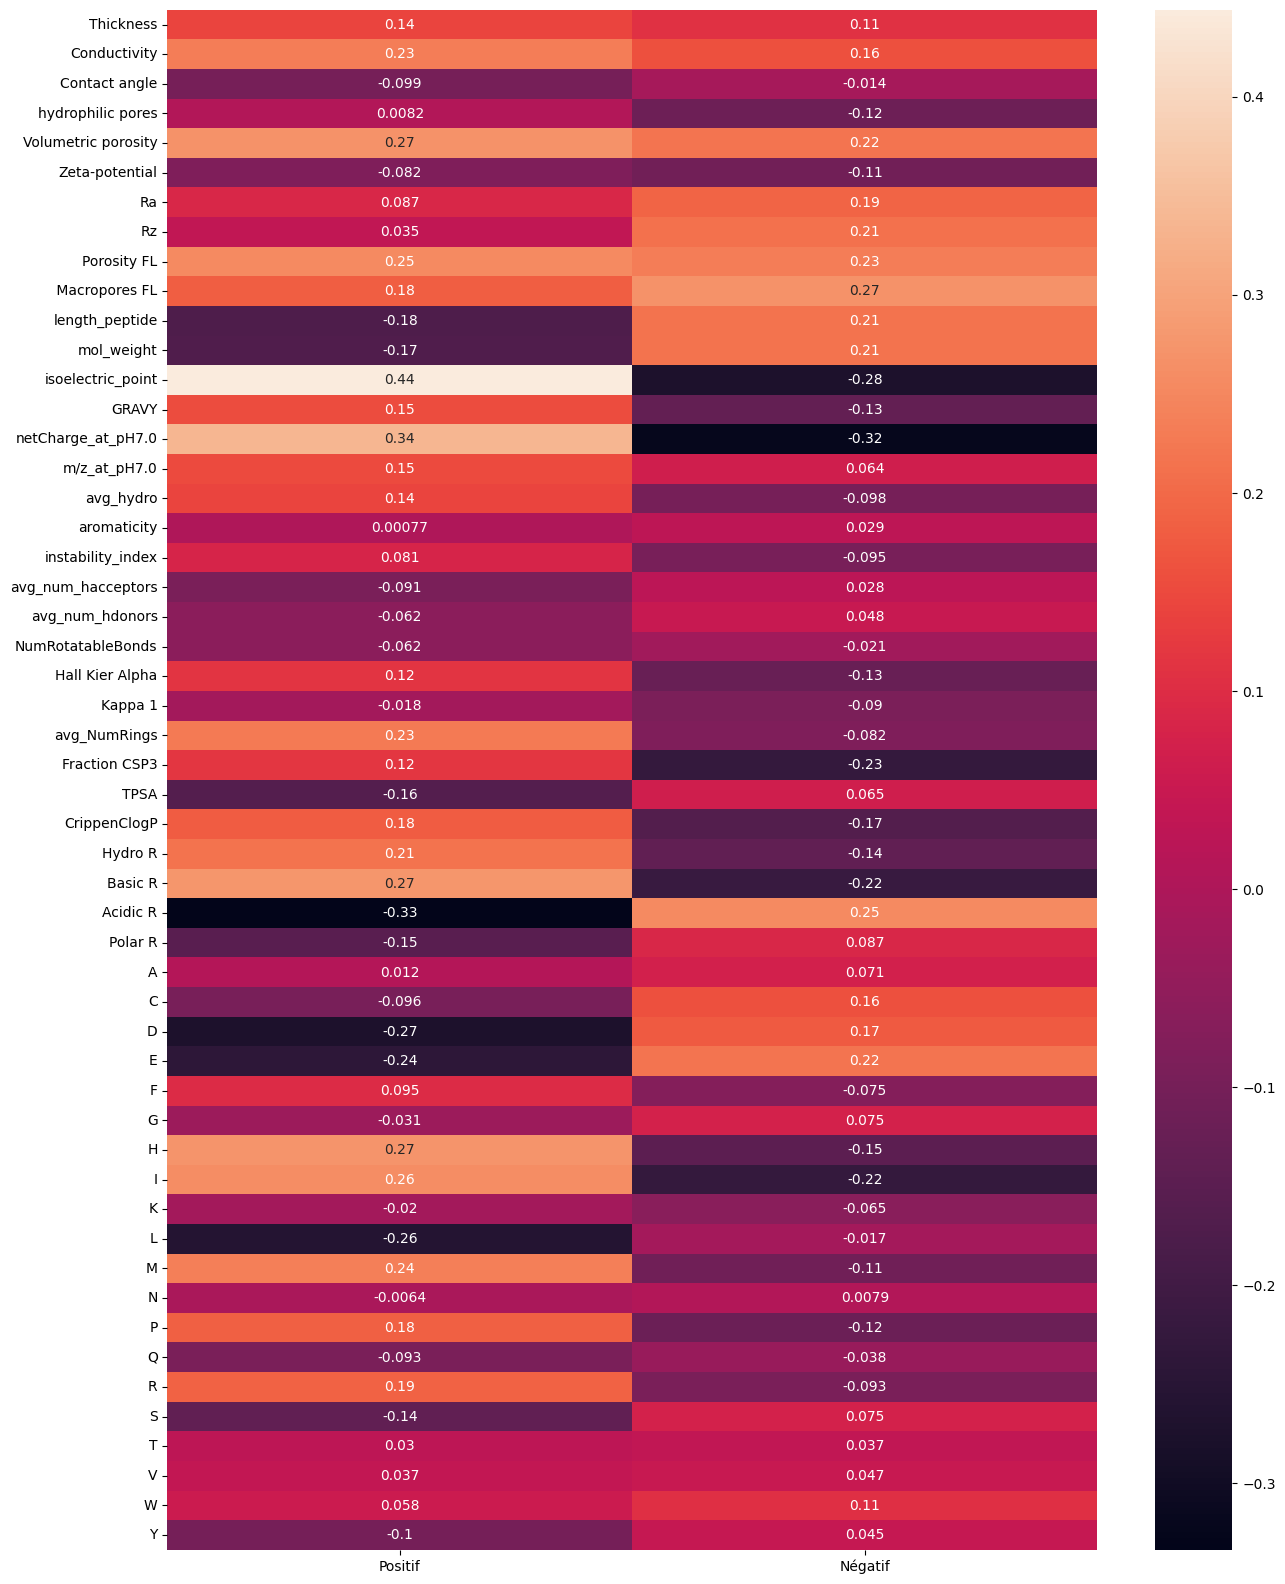

In [ ]:
X, y_pos = load_data_mean(True)
_, y_neg = load_data_mean(False)
array = X.values
pos_vals = []
neg_vals = []
for i in range(array.shape[1]):
    pos_vals.append(pearsonr(array[:, i], y_pos)[0])
    neg_vals.append(pearsonr(array[:, i], y_neg)[0])
df_y = pd.DataFrame(np.array([pos_vals, neg_vals]).T, index=X.columns, columns=['Positif', 'Négatif'])
plt.figure(figsize=(15, 20))
sns.heatmap(df_y, annot=True)
plt.savefig("./correlation_y_values.pdf")

In [ ]:
df_peptide_avec = df_peptide
df_membrane_avec = df_membrane
df_y_avec = df_y

## Calcul de l'importance avec les deux premières membranes

In [ ]:
X, y = load_data_mean(True)
membrane = ['Contact angle', 'hydrophilic pores',
            'Volumetric porosity', 'Zeta-potential', 'Rz', ' Macropores FL']

peptide = ['mol_weight', 'isoelectric_point',
           'GRAVY', 'm/z_at_pH7.0',
            'Hall Kier Alpha', 'Polar R', 'A', 'D', 'F', 'H',
            'K', 'L', 'N', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
X_selected = X[membrane + peptide]

regressor = RandomForestRegressor(random_state=1, n_estimators=1000)
regressor.fit(X_selected, y)
print("="*10, "Y positifs", "="*10)
print(pd.DataFrame(regressor.feature_importances_.T, index=X_selected.columns).sort_values(by=0, ascending=False))

<ipython-input-15-671561ae2086>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',


========== Y positifs ==========
                            0
Volumetric porosity  0.348338
m/z_at_pH7.0         0.264418
isoelectric_point    0.141589
Contact angle        0.059443
 Macropores FL       0.033249
Rz                   0.026998
Zeta-potential       0.021161
A                    0.019576
mol_weight           0.014355
Hall Kier Alpha      0.010924
hydrophilic pores    0.008006
GRAVY                0.007404
L                    0.007297
H                    0.006696
Polar R              0.006459
S                    0.006433
K                    0.005725
T                    0.002557
F                    0.002512
V                    0.001651
N                    0.001584
Q                    0.001504
R                    0.000942
Y                    0.000672
W                    0.000504
D                    0.000000


In [ ]:
X, y = load_data_mean(False)
membrane = ['Contact angle', 'hydrophilic pores',
            'Volumetric porosity', 'Zeta-potential', 'Rz', ' Macropores FL']

peptide = ['mol_weight', 'isoelectric_point',
           'GRAVY', 'm/z_at_pH7.0',
            'Hall Kier Alpha', 'Polar R', 'A', 'D', 'F', 'H',
            'K', 'L', 'N', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
X_selected = X[membrane + peptide]

regressor = RandomForestRegressor(random_state=1, n_estimators=1000)
regressor.fit(X_selected, y)
print("="*10, "Y négatifs", "="*10)
print(pd.DataFrame(regressor.feature_importances_.T, index=X_selected.columns).sort_values(by=0, ascending=False))

<ipython-input-15-671561ae2086>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',


========== Y négatifs ==========
                            0
isoelectric_point    0.233170
 Macropores FL       0.128328
Rz                   0.121830
Volumetric porosity  0.084119
Zeta-potential       0.061365
hydrophilic pores    0.054839
L                    0.046335
Contact angle        0.045334
Hall Kier Alpha      0.039596
mol_weight           0.030688
GRAVY                0.024722
D                    0.016047
W                    0.015233
m/z_at_pH7.0         0.013753
A                    0.013619
K                    0.013548
V                    0.008812
F                    0.008646
T                    0.008175
Polar R              0.007463
Y                    0.006803
S                    0.006196
Q                    0.004752
R                    0.003751
N                    0.002784
H                    0.000094


# Sans les deux premières membranes

In [ ]:
decalage = np.array([34, 22])
decalage_full = 56

def load_data():
    df = pd.read_csv("./Donnees_peptides_membranes (Anionic-Cationic) VF.csv", sep=";")
    df = df.iloc[decalage_full:,:]
    l = ['R1 A-', 'R2 A-', 'R3 A-', 'R1 C+', 'R2 C+', 'R3 C+']
    y = df[l]
    y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',
                      'R3 A-': 'R3_A', 'R1 C+': 'R1_C',
                      'R2 C+': 'R2_C', 'R3 C+': 'R3_C'},
             inplace=True)
    l = l + ['membrane', 'Peptides', 'bend_percent', 'turn_percent']
    df = df.drop(columns=l)
    return df, y

def load_data_mean(boolean):
    """
    Retourne les données. On prend la moyenne de la variable réponse.
    :param boolean: True si on veut les données positives, False sinon.
    :return:
    """
    df, y = load_data()
    if boolean:
        y_pos = y[['R1_C', 'R2_C', 'R2_C']].mean(axis=1)
        return df, y_pos
    else:
        y_neg = y[['R1_A', 'R2_A', 'R3_A']].mean(axis=1)
        return df, y_neg

## Corrélation membrane-membrane

<ipython-input-24-850addfc01ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',


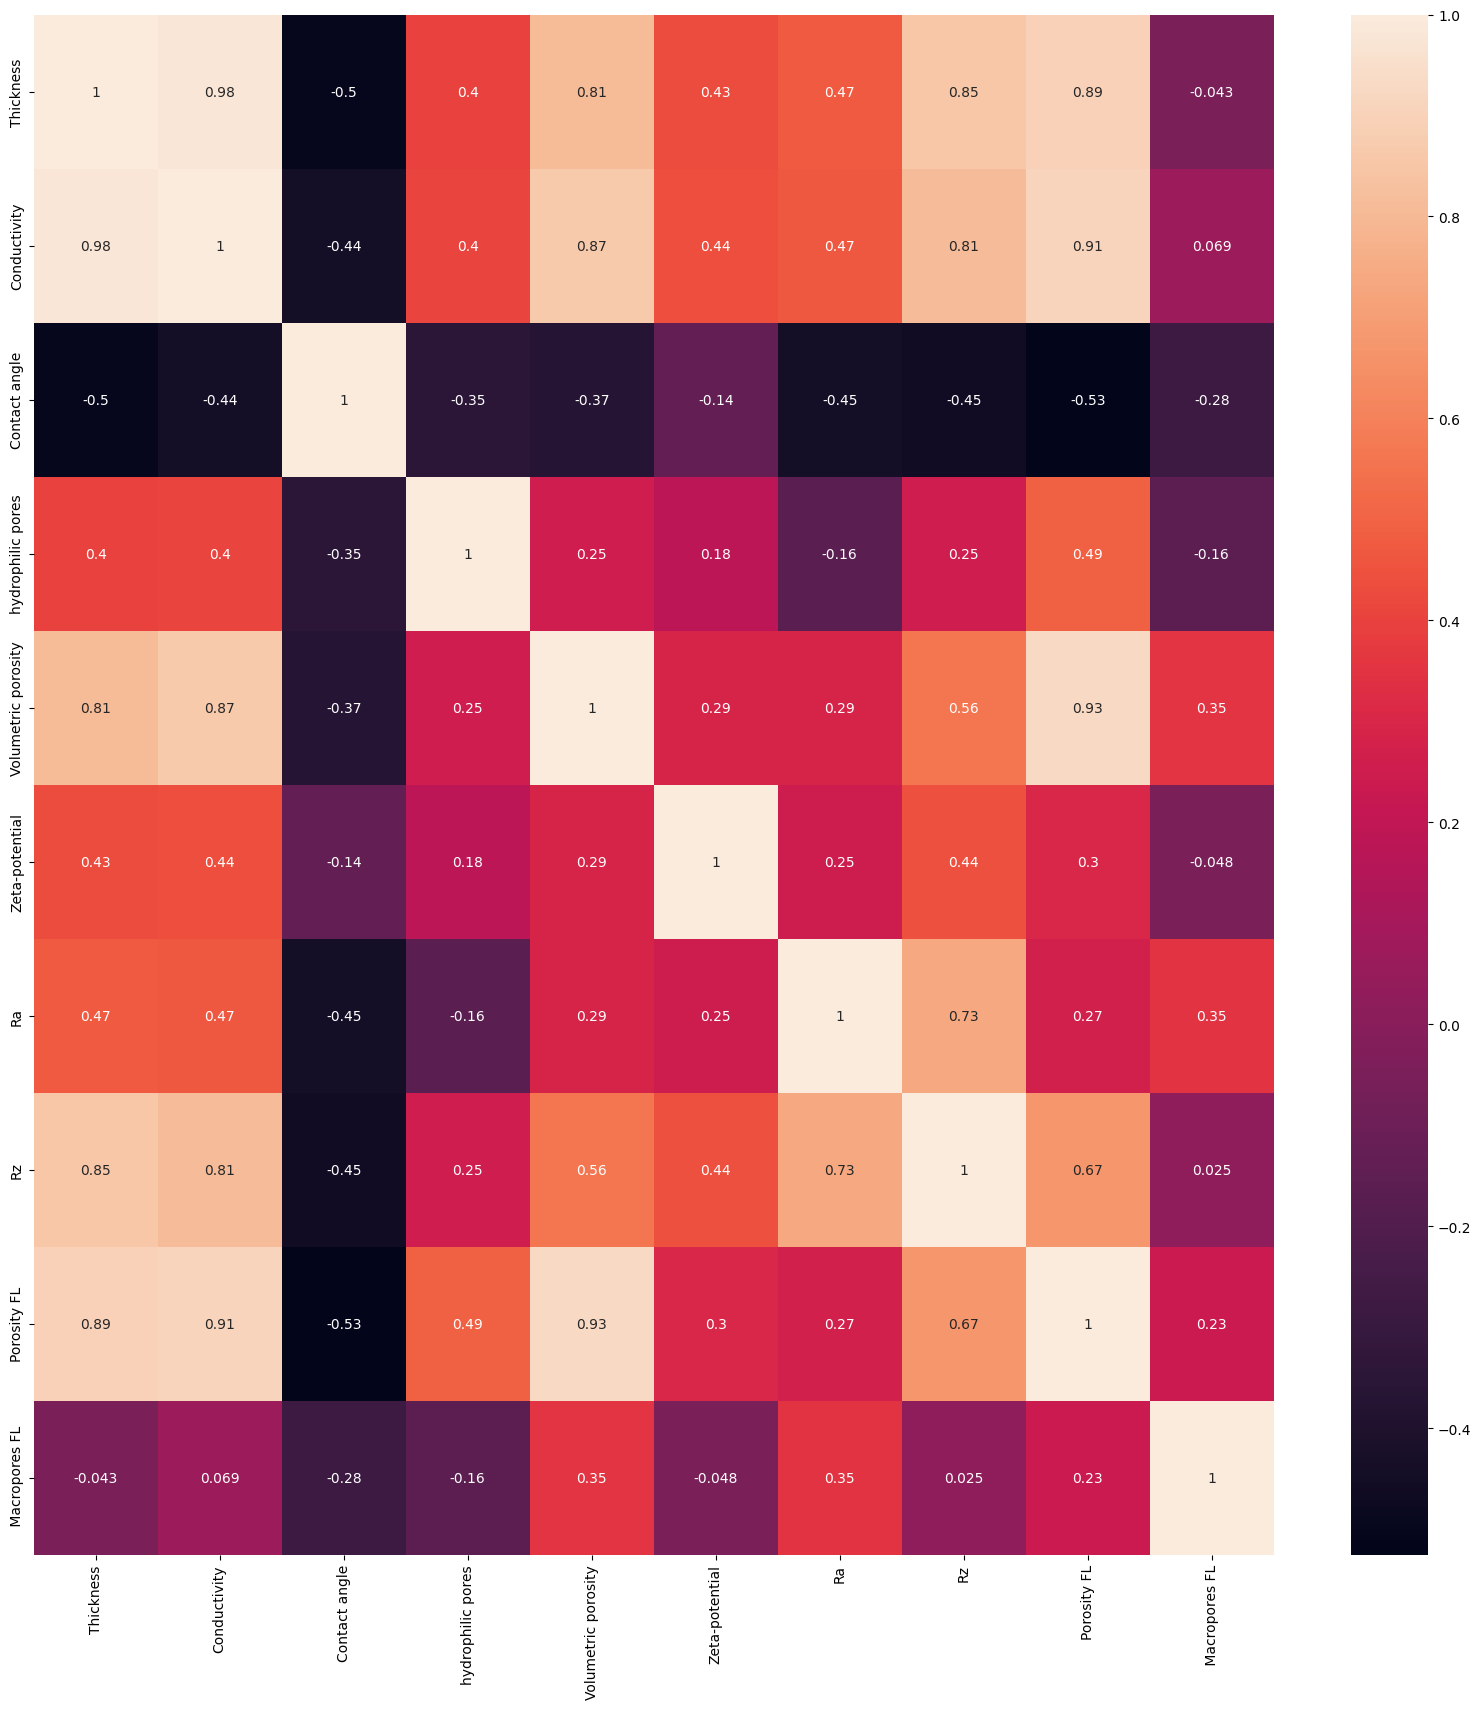

In [ ]:
X, y = load_data_mean(True)
membrane = ['Thickness', 'Conductivity', 'Contact angle', 'hydrophilic pores',
     'Volumetric porosity', 'Zeta-potential', 'Ra', 'Rz', 'Porosity FL',
     ' Macropores FL']
membrane_X = X[membrane]
df_membrane = membrane_X.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(df_membrane, annot=True)
plt.savefig("./matrice_correlation_membrane_sans_PVDF800_CF55.pdf")
array_membrane = df_membrane.values

In [ ]:
array_membrane = df_membrane.values
print("="*20, "Corrélation entre les caractéristiques de membranes", "="*20)
for i in range(array_membrane.shape[0]):
    for j in range(i+1, array_membrane.shape[1]):
        if np.abs(array_membrane[i, j]) >= 0.6:
            print(membrane[i], " + ",  membrane[j], "avec une corrélation de ", array_membrane[i, j])

==================== Corrélation entre les caractéristiques de membranes ====================
Thickness  +  Conductivity avec une corrélation de  0.9762387370199794
Thickness  +  Volumetric porosity avec une corrélation de  0.8069164406162963
Thickness  +  Rz avec une corrélation de  0.8533909688766811
Thickness  +  Porosity FL avec une corrélation de  0.8933635903838903
Conductivity  +  Volumetric porosity avec une corrélation de  0.8669286787732781
Conductivity  +  Rz avec une corrélation de  0.8139532646531286
Conductivity  +  Porosity FL avec une corrélation de  0.9061009288110193
Volumetric porosity  +  Porosity FL avec une corrélation de  0.926404235915173
Ra  +  Rz avec une corrélation de  0.732007359625908
Rz  +  Porosity FL avec une corrélation de  0.6700444953689624


## Corrélation peptide-peptide

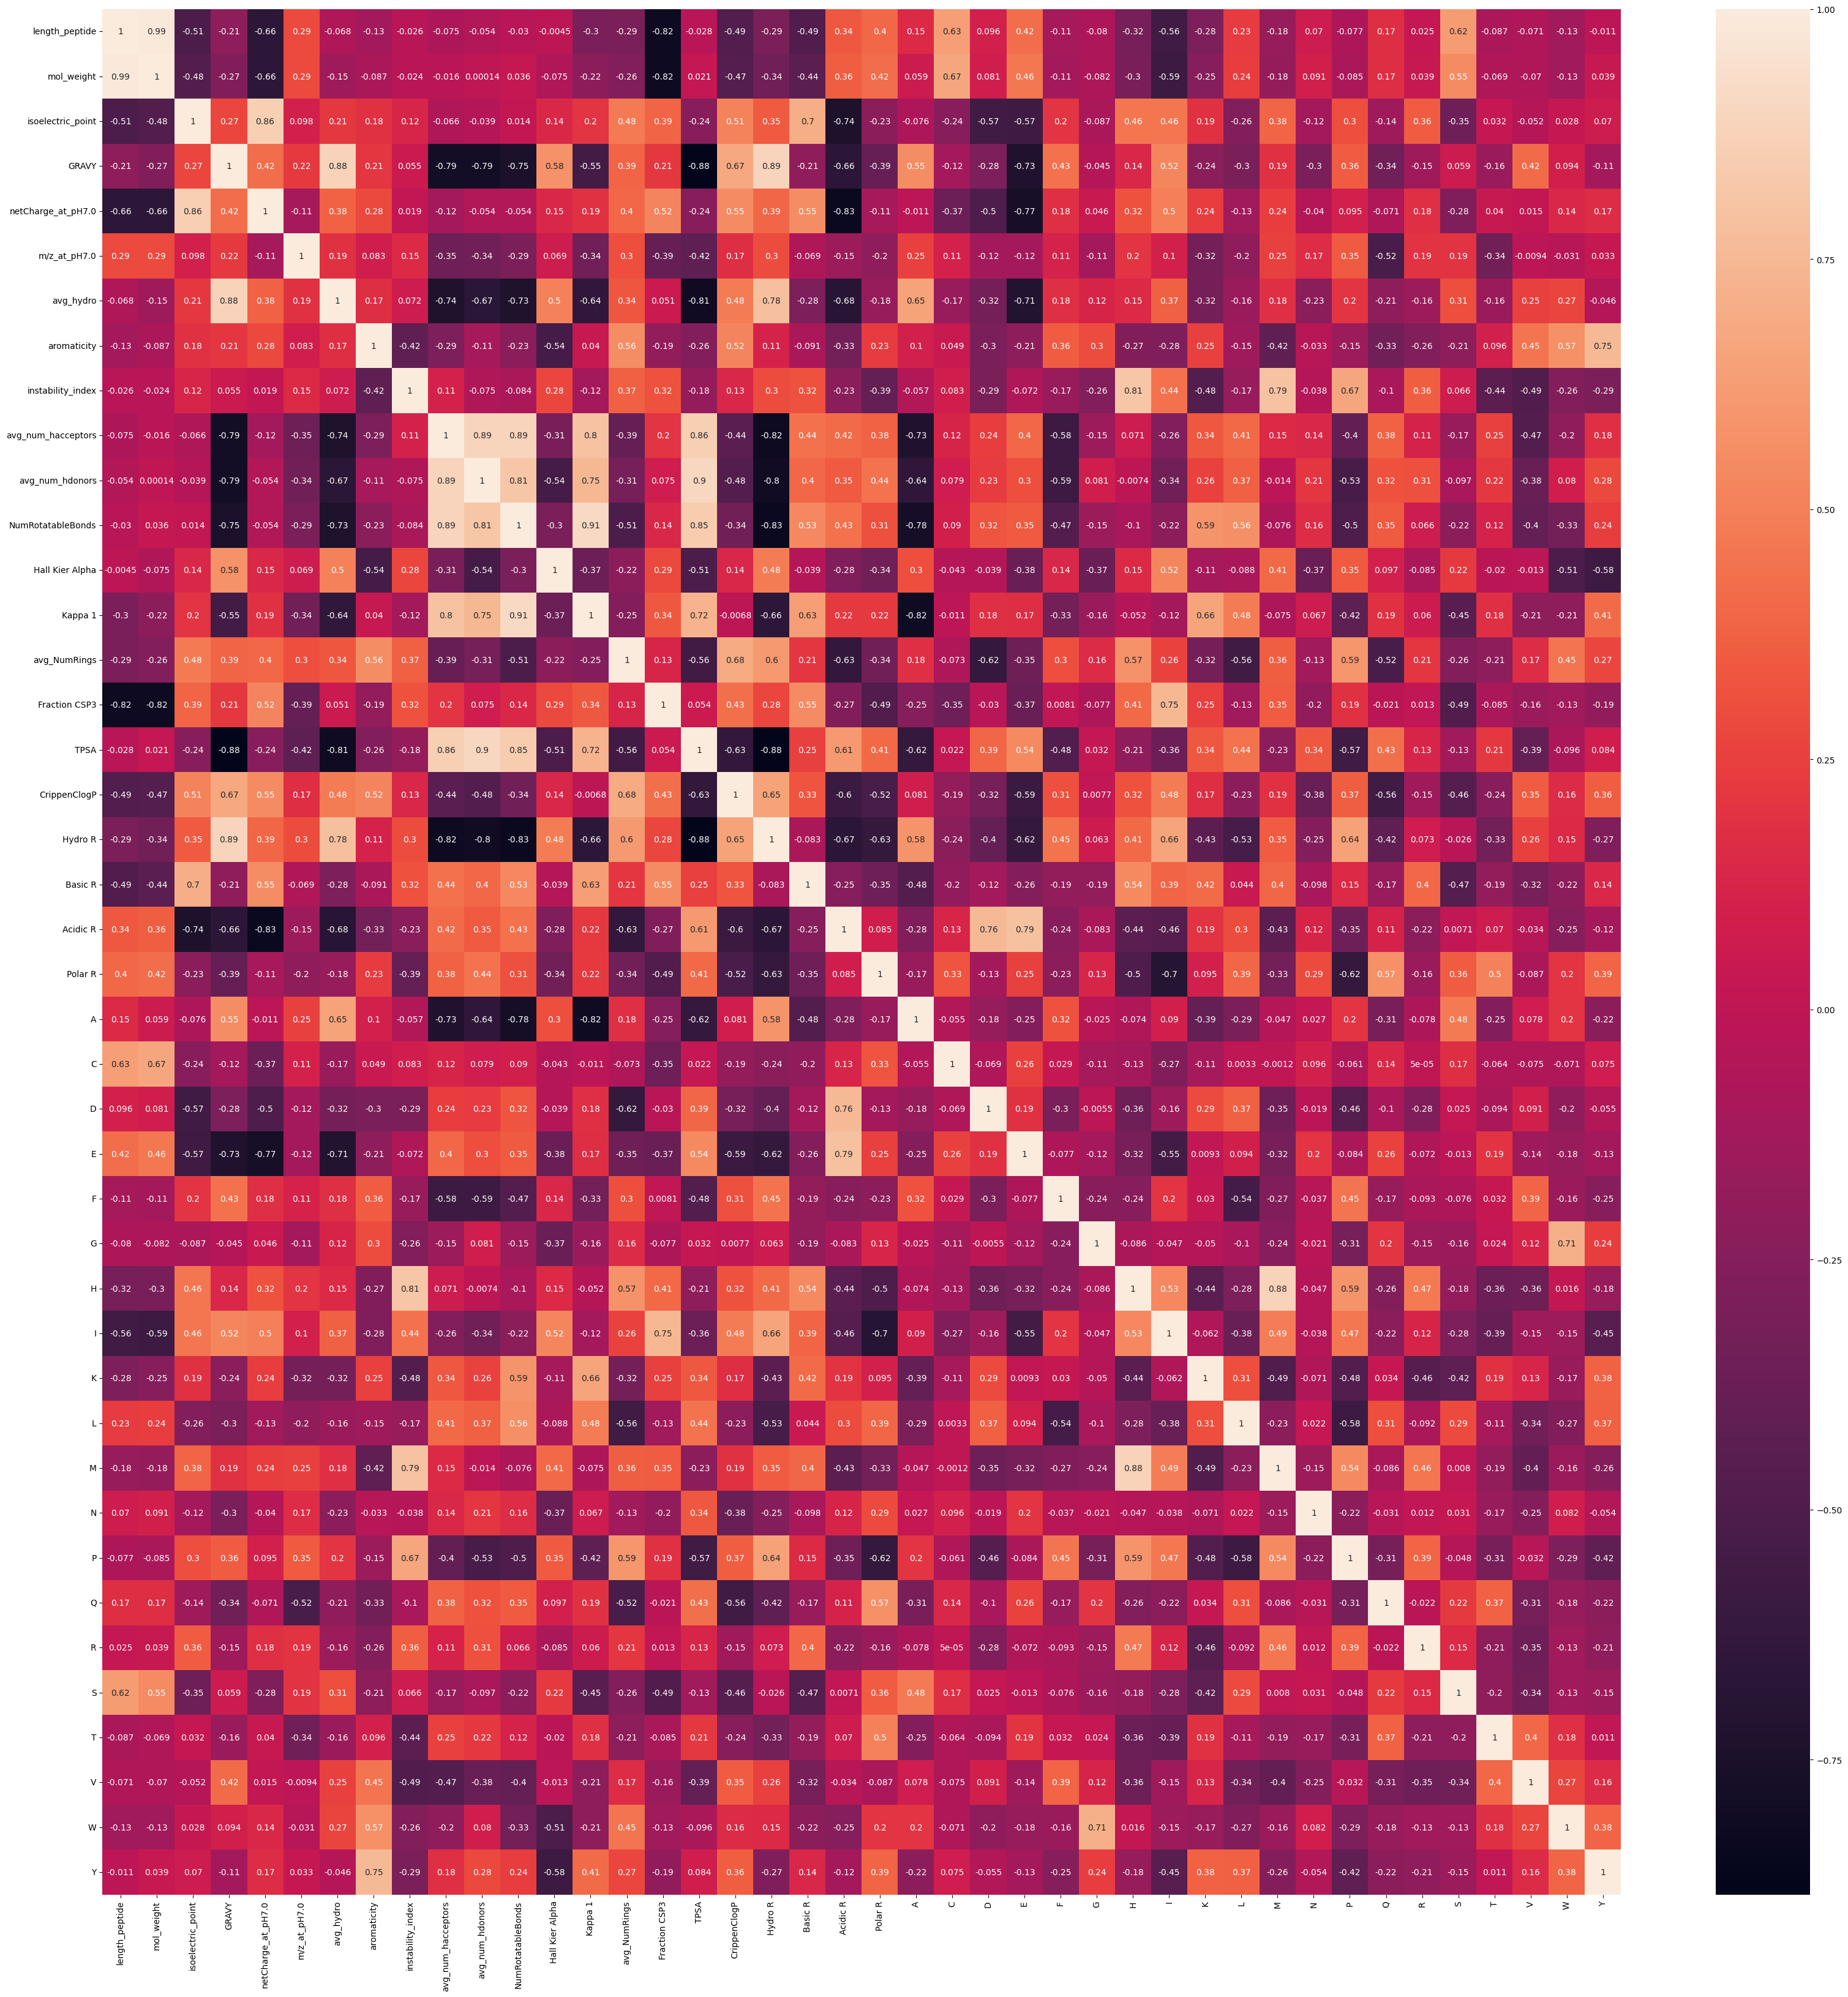

In [ ]:
peptide = ['length_peptide', 'mol_weight', 'isoelectric_point',
  'GRAVY', 'netCharge_at_pH7.0', 'm/z_at_pH7.0', 'avg_hydro',
  'aromaticity', 'instability_index', 'avg_num_hacceptors',
  'avg_num_hdonors', 'NumRotatableBonds', 'Hall Kier Alpha', 'Kappa 1',
  'avg_NumRings', 'Fraction CSP3', 'TPSA', 'CrippenClogP', 'Hydro R',
  'Basic R', 'Acidic R', 'Polar R', 'A', 'C', 'D', 'E', 'F', 'G', 'H',
  'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
peptide_X = X[peptide]
df_peptide = peptide_X.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(df_peptide, annot=True)
plt.savefig("./matrice_correlation_peptide_sans_PVDF800_CF55.pdf")

In [ ]:
print("\n", "=" * 20, "Corrélation entre les caractéristiques de peptides", "=" * 20)
array_peptide = df_peptide.values
for i in range(array_peptide.shape[0]):
    for j in range(i+1, array_peptide.shape[1]):
        if np.abs(array_peptide[i, j]) >= 0.6:
            print(peptide[i], " + ", peptide[j], "avec une corrélation de ", array_peptide[i, j])


 ==================== Corrélation entre les caractéristiques de peptides ====================
length_peptide  +  mol_weight avec une corrélation de  0.9925880795421805
length_peptide  +  netCharge_at_pH7.0 avec une corrélation de  -0.6603263035153886
length_peptide  +  Fraction CSP3 avec une corrélation de  -0.8210130674625101
length_peptide  +  C avec une corrélation de  0.6283594311473638
length_peptide  +  S avec une corrélation de  0.6193104755755899
mol_weight  +  netCharge_at_pH7.0 avec une corrélation de  -0.6569525848851394
mol_weight  +  Fraction CSP3 avec une corrélation de  -0.8205303552030492
mol_weight  +  C avec une corrélation de  0.6678842894371942
isoelectric_point  +  netCharge_at_pH7.0 avec une corrélation de  0.8579940568673533
isoelectric_point  +  Basic R avec une corrélation de  0.6983668743373621
isoelectric_point  +  Acidic R avec une corrélation de  -0.7393375222776652
GRAVY  +  avg_hydro avec une corrélation de  0.8814619126196301
GRAVY  +  avg_num_hacceptor

## Corrélation données-étiquettes

<ipython-input-24-850addfc01ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',
<ipython-input-24-850addfc01ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',


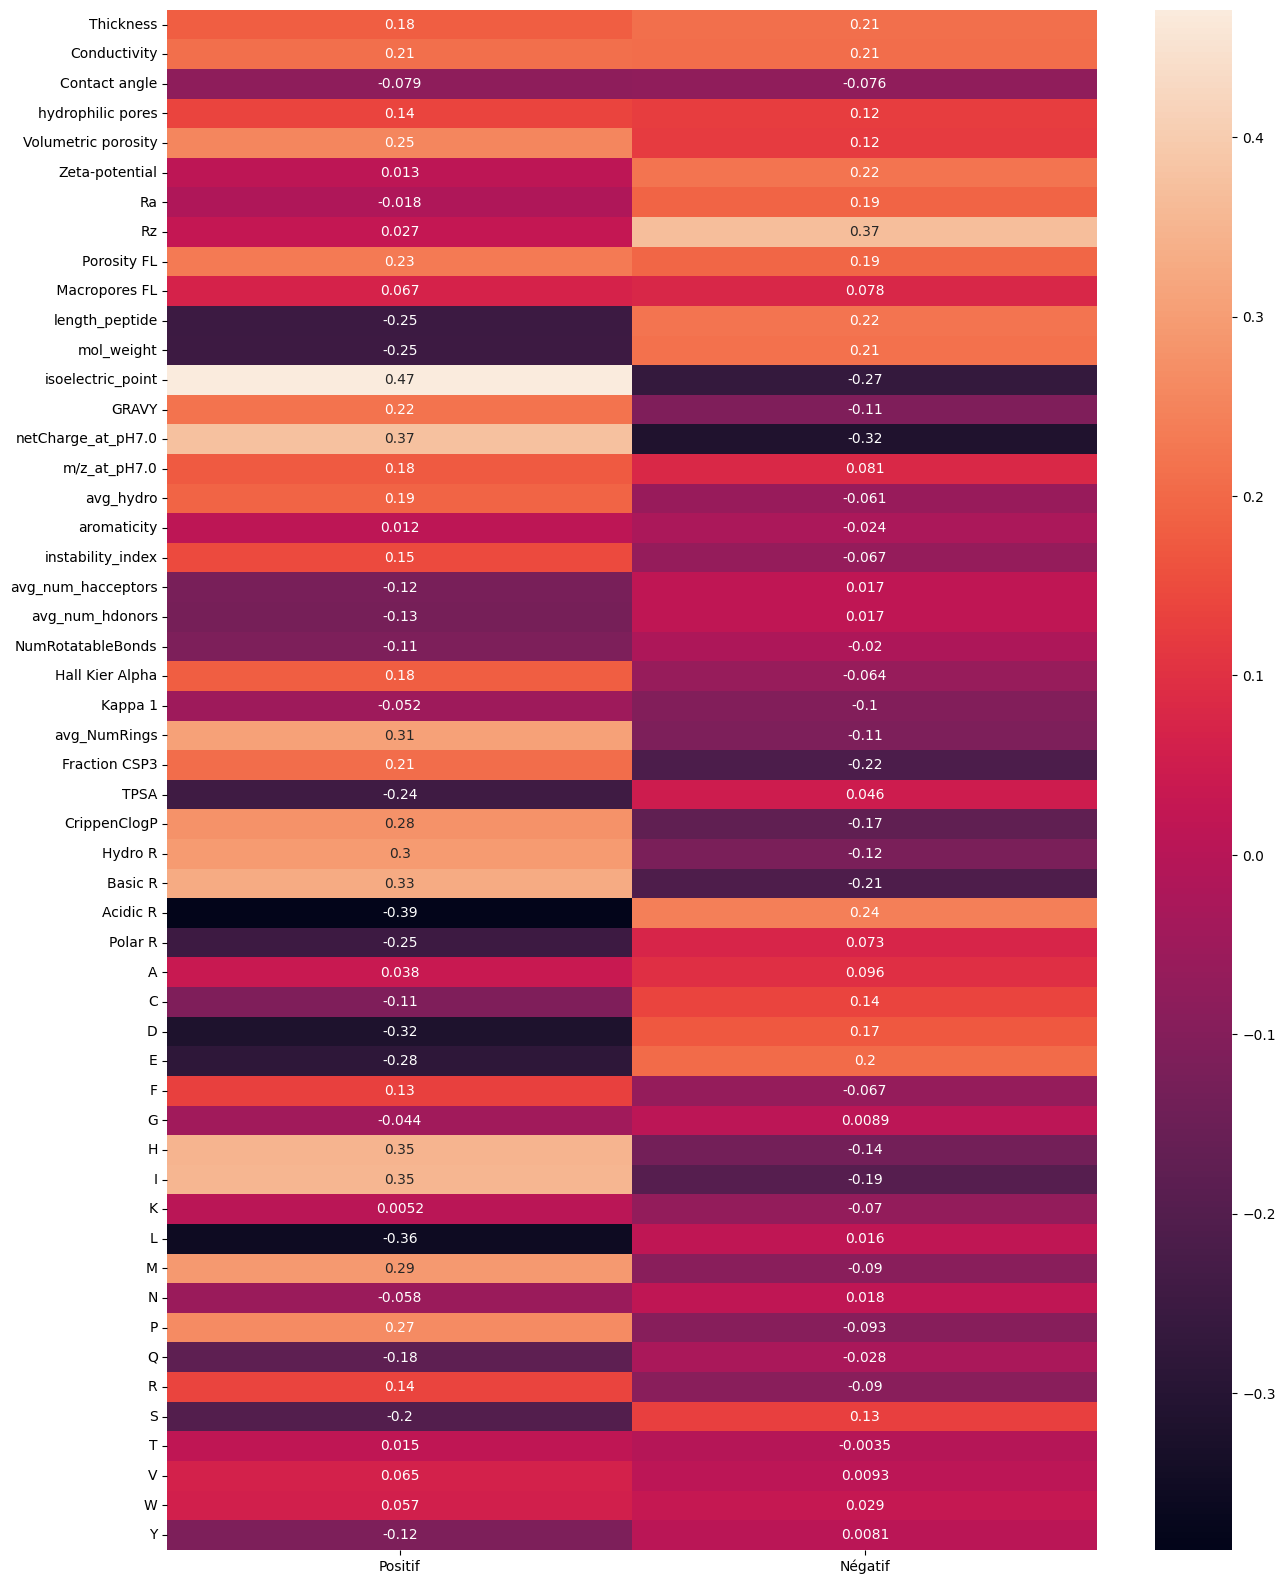

In [ ]:
X, y_pos = load_data_mean(True)
_, y_neg = load_data_mean(False)
array = X.values
pos_vals = []
neg_vals = []
for i in range(array.shape[1]):
    pos_vals.append(pearsonr(array[:, i], y_pos)[0])
    neg_vals.append(pearsonr(array[:, i], y_neg)[0])
df_y = pd.DataFrame(np.array([pos_vals, neg_vals]).T, index=X.columns, columns=['Positif', 'Négatif'])
plt.figure(figsize=(15, 20))
sns.heatmap(df_y, annot=True)
plt.savefig("./correlation_y_values_sans_PVDF800_CF55.pdf")

In [ ]:
df_membrane_sans = df_membrane
df_peptide_sans = df_peptide
df_y_sans = df_y

## Calcul de l'importance sans les deux premières membranes

In [ ]:
X, y = load_data_mean(True)
membrane = ['Contact angle', 'hydrophilic pores',
            'Volumetric porosity', 'Zeta-potential', 'Rz', ' Macropores FL']

peptide = ['mol_weight', 'isoelectric_point',
           'GRAVY', 'm/z_at_pH7.0',
            'Hall Kier Alpha', 'Polar R', 'A', 'D', 'F', 'H',
            'K', 'L', 'N', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
X_selected = X[membrane + peptide]

regressor = RandomForestRegressor(random_state=1, n_estimators=1000)
regressor.fit(X_selected, y)
print("="*10, "Y positifs", "="*10)
print(pd.DataFrame(regressor.feature_importances_.T, index=X_selected.columns).sort_values(by=0, ascending=False))

<ipython-input-24-850addfc01ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',


========== Y positifs ==========
                            0
m/z_at_pH7.0         0.443741
Volumetric porosity  0.314110
L                    0.039667
Rz                   0.024961
Zeta-potential       0.022580
mol_weight           0.021162
Contact angle        0.019961
 Macropores FL       0.017569
hydrophilic pores    0.016114
isoelectric_point    0.015219
H                    0.014953
Polar R              0.007411
Hall Kier Alpha      0.007065
A                    0.006810
S                    0.005730
GRAVY                0.004740
K                    0.003907
T                    0.002997
V                    0.002695
R                    0.002422
Q                    0.002339
F                    0.001556
N                    0.001076
Y                    0.000627
W                    0.000585
D                    0.000000


In [ ]:
X, y = load_data_mean(False)
membrane = ['Contact angle', 'hydrophilic pores',
            'Volumetric porosity', 'Zeta-potential', 'Rz', ' Macropores FL']

peptide = ['mol_weight', 'isoelectric_point',
           'GRAVY', 'm/z_at_pH7.0',
            'Hall Kier Alpha', 'Polar R', 'A', 'D', 'F', 'H',
            'K', 'L', 'N', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
X_selected = X[membrane + peptide]

regressor = RandomForestRegressor(random_state=1, n_estimators=1000)
regressor.fit(X_selected, y)
print("="*10, "Y négatifs", "="*10)
print(pd.DataFrame(regressor.feature_importances_.T, index=X_selected.columns).sort_values(by=0, ascending=False))

<ipython-input-24-850addfc01ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'R1 A-': 'R1_A', 'R2 A-': 'R2_A',


========== Y négatifs ==========
                            0
isoelectric_point    0.518000
Rz                   0.291010
mol_weight           0.049887
 Macropores FL       0.044722
Hall Kier Alpha      0.011480
W                    0.009971
K                    0.008245
m/z_at_pH7.0         0.007526
D                    0.006227
L                    0.006106
GRAVY                0.004906
A                    0.004789
Polar R              0.004405
Y                    0.004205
T                    0.003879
Zeta-potential       0.003708
Q                    0.003666
S                    0.003233
Volumetric porosity  0.002512
R                    0.002376
V                    0.002334
F                    0.002004
N                    0.001928
Contact angle        0.001795
hydrophilic pores    0.001086
H                    0.000000


# Comparaison de la différence lorsqu'on appelle les deux premières membranes


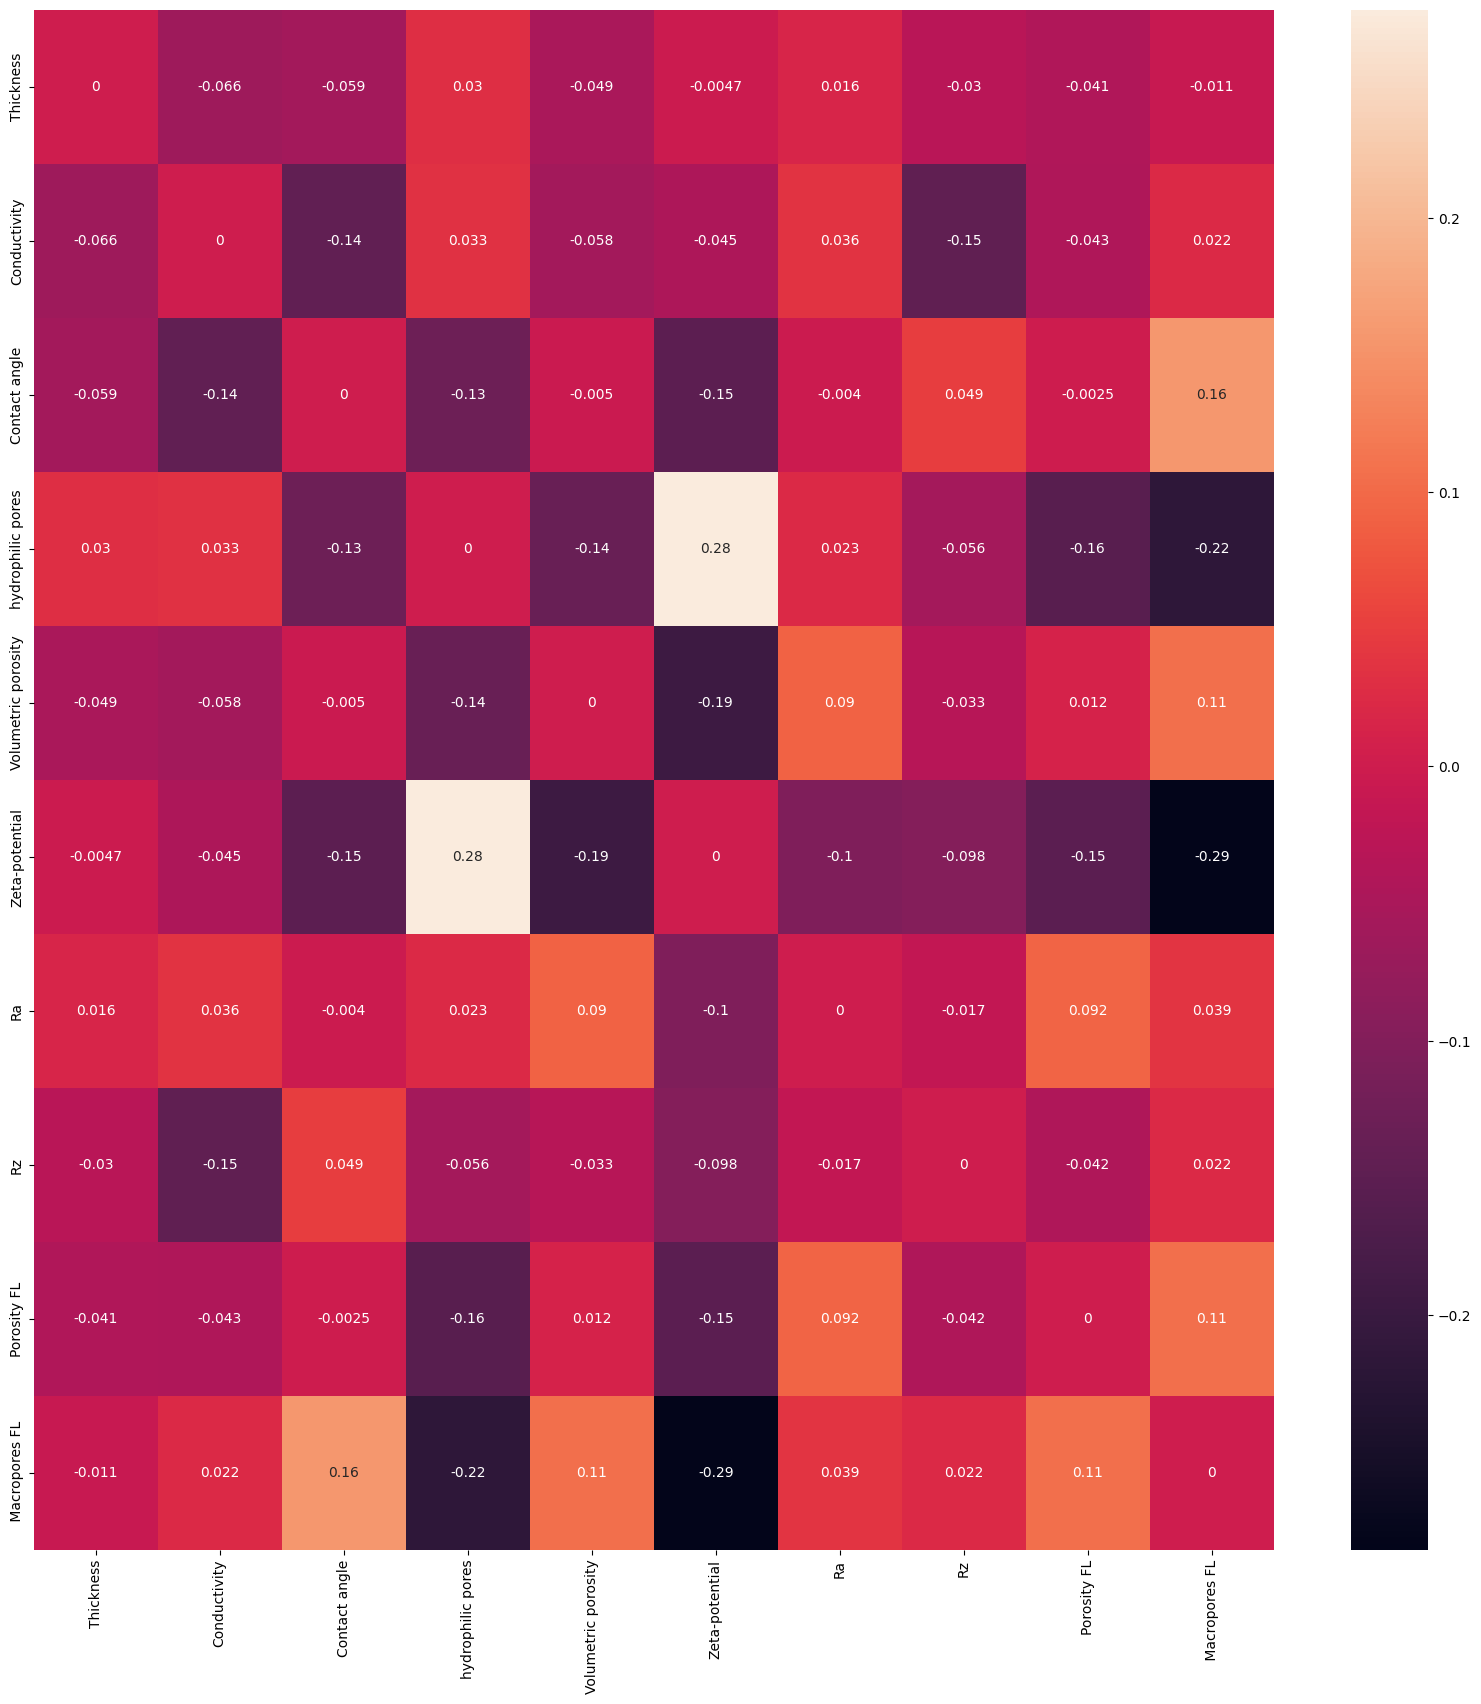

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_membrane_avec - df_membrane_sans,annot=True)
plt.show()

In [ ]:
array_membrane = (df_membrane_avec - df_membrane_sans).values
print("="*20, "Corrélation entre les caractéristiques de membranes", "="*20)
for i in range(array_membrane.shape[0]):
    for j in range(i+1, array_membrane.shape[1]):
        if np.abs(array_membrane[i, j]) >= 0.1:
            print(membrane[i], " + ",  membrane[j], "avec une corrélation de ", array_membrane[i, j])

==================== Corrélation entre les caractéristiques de membranes ====================
hydrophilic pores  +  Volumetric porosity avec une corrélation de  -0.1444028130843678


IndexError: list index out of range

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(df_peptide_avec - df_peptide_sans,annot=True)
plt.show()

In [ ]:
print("\n", "=" * 20, "Corrélation entre les caractéristiques de peptides", "=" * 20)
array_peptide = (df_peptide_avec - df_peptide_sans).values
for i in range(array_peptide.shape[0]):
    for j in range(i+1, array_peptide.shape[1]):
        if np.abs(array_peptide[i, j]) >= 0.1:
            print(peptide[i], " + ", peptide[j], "avec une corrélation de ", array_peptide[i, j])

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(df_y_avec - df_y_sans,annot=True)
plt.show()